# Lasso Regression

Lasso Regression, short for Least Absolute Shrinkage and Selection Operator, is a linear regression technique that includes regularization to prevent overfitting and perform feature selection.  Here's a breakdown:

**Core Idea:**

Lasso adds a penalty term to the ordinary least squares regression objective function. This penalty is proportional to the absolute value of the coefficients (L1 regularization). This penalty encourages the model to shrink the coefficients of less important features towards zero, and in some cases, can shrink them exactly to zero.

**How it Works:**

1. **Ordinary Least Squares (OLS):**  Traditional linear regression aims to minimize the sum of squared errors between predicted and actual values.

2. **L1 Penalty:** Lasso adds a term that penalizes large coefficients.  The larger the absolute value of a coefficient, the greater the penalty.

3. **Shrinkage:**  During the optimization process, Lasso tries to minimize both the sum of squared errors and the L1 penalty. This leads to shrinking the coefficients.

4. **Feature Selection:** Because the penalty can force coefficients to become exactly zero, Lasso effectively performs feature selection. Features with zero coefficients are excluded from the model.

**What it's Used For:**

* **High-Dimensional Data:** When you have many features (more than samples), Lasso can help identify the most relevant ones and discard the rest, improving model performance and interpretability.
* **Feature Importance:** Lasso helps understand which features are most influential in predicting the target variable.
* **Preventing Overfitting:** By shrinking coefficients, Lasso reduces model complexity and prevents it from memorizing noise in the training data, leading to better generalization to unseen data.
* **Sparse Models:** Lasso produces sparse models (models with many zero coefficients), which are easier to interpret and can be more efficient to compute with.

**In simpler terms:** Imagine you're trying to predict house prices, and you have many features like size, location, age, number of windows, etc. Lasso can help you find the most important factors (maybe size, location, and age) and ignore less relevant ones (like number of windows) to build a simpler, more robust prediction model.
morm

## Imports

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

That's a great start! You've imported all the necessary libraries for performing Lasso Regression. Here's a breakdown of what each import does and why it's important:

*   **`import numpy as np`**: NumPy (Numerical Python) is the fundamental package for numerical computation in Python. It provides powerful array objects (like `np.array`) and tools for working with these arrays.  We import it as `np` for brevity.  NumPy is essential for handling the data in a numerical format that scikit-learn (the machine learning library we'll use) requires.

*   **`import pandas as pd`**: Pandas provides data structures like DataFrames, which are very useful for organizing and manipulating data.  DataFrames allow you to label your data (rows and columns), handle missing values easily, and perform various data transformations.  We import it as `pd`. While not strictly required for the core Lasso Regression, it's highly recommended for data preprocessing and exploration.

*   **`import matplotlib.pyplot as plt`**: Matplotlib is Python's plotting library.  We use it to visualize the data, the model's predictions, and other results.  `plt` is the conventional alias.  Visualizations are crucial for understanding model behavior and results.

*   **`import sklearn.model_selection.train_test_split`**:  `train_test_split` is a function from scikit-learn that allows you to split your data into training and testing sets.  This is a crucial step in machine learning to evaluate how well your model generalizes to unseen data.

*   **`import sklearn.linear_model.Lasso, LassoCV`**:  These are the core imports for Lasso Regression. `Lasso` is the class for performing Lasso regression with a manually chosen regularization parameter (alpha). `LassoCV` is used for Lasso with cross-validation, which automatically finds the best alpha value.

*   **`import sklearn.preprocessing.StandardScaler`**: `StandardScaler` is used for feature scaling.  Lasso is sensitive to the scales of the features, so it's often essential to standardize them (make them have zero mean and unit variance) before applying Lasso.

*   **`import sklearn.metrics.mean_squared_error, r2_score`**: These are the metrics we'll use to evaluate the performance of our Lasso model.  `mean_squared_error` calculates the mean squared difference between the predicted and actual values, and `r2_score` calculates the R-squared coefficient, which represents the proportion of variance in the target variable explained by the model.

With these imports in place, you're ready to proceed with data loading, preprocessing, model training, and evaluation.  You've laid the foundation for a successful Lasso Regression analysis!


## Data Generation (Synthetic Data)
We create synthetic data with a known relationship between features and the target, including some features with zero coefficients to demonstrate feature selection.

In [25]:
np.random.seed(0)  # For reproducibility
n_samples = 100
n_features = 10
X = np.random.randn(n_samples, n_features)  # Features
true_coeffs = np.array([1, -2, 0.5, 0, 0, 0, 0, 0, 0, 0])  # True coefficients (some are zero)
y = X @ true_coeffs + np.random.randn(n_samples) * 0.5  # Target variable with noise

This code snippet generates a synthetic dataset for a regression problem, specifically designed to demonstrate the effects of regularization (like Lasso or Ridge). Let's break down each line:

1. **`np.random.seed(0)`**:
   - This line sets the seed for NumPy's random number generator.  Setting a seed ensures that the random numbers generated are always the same sequence. This is crucial for reproducibility. If you run this code multiple times, you'll get the exact same dataset every time, which is helpful for debugging and consistent comparisons.

2. **`n_samples = 100`**:
   - This defines the number of data points (samples) in the dataset.  Here, we're creating a dataset with 100 samples.

3. **`n_features = 10`**:
   - This sets the number of features (independent variables) for each data point. Each sample will have 10 features.

4. **`X = np.random.randn(n_samples, n_features)`**:
   - This generates the feature matrix `X`.
   - `np.random.randn(n_samples, n_features)` creates a 2D array (matrix) of shape (100, 10) filled with random numbers drawn from a standard normal distribution (mean 0, standard deviation 1).  So, `X` is a 100x10 matrix where each row represents a sample and each column represents a feature.

5. **`true_coeffs = np.array([1, -2, 0.5, 0, 0, 0, 0, 0, 0, 0])`**:
   - This defines the "true" coefficients for the underlying relationship between the features and the target variable.  Crucially, notice that most of these coefficients are zero. This is a setup to demonstrate feature selection.  Only the first three features (corresponding to coefficients 1, -2, and 0.5) are actually relevant in determining the target variable.

6. **`y = X @ true_coeffs + np.random.randn(n_samples) * 0.5`**:
   - This generates the target variable `y`.
   - `X @ true_coeffs` performs a matrix multiplication of the feature matrix `X` with the `true_coeffs` vector. This calculates the "true" underlying relationship.
   - `np.random.randn(n_samples) * 0.5` adds random noise to the target variable.  `np.random.randn(n_samples)` creates an array of 100 random numbers from a standard normal distribution. Multiplying by 0.5 scales the noise down a bit.  This noise simulates real-world data where there's always some degree of randomness or error.

**In summary:** This code creates a synthetic dataset where:

- There are 100 data points.
- Each data point has 10 features.
- The target variable `y` is generated as a linear combination of the first three features (with coefficients 1, -2, and 0.5 respectively) plus some random noise.  The other 7 features are irrelevant (their true coefficients are 0).

This kind of dataset is perfect for demonstrating Lasso regression because Lasso is designed to identify and select the most important features (the ones with non-zero coefficients) and discard the irrelevant ones. You can see how well Lasso can recover the `true_coeffs` despite the added noise.


In [12]:
# Convert to Pandas DataFrame for easier handling
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(n_features)])
df['target'] = y

This code snippet takes the NumPy array `X` (containing your features) and the NumPy array `y` (containing your target variable) and creates a Pandas DataFrame called `df`. Let's break it down:

1. **`df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(n_features)])`**:
   - `pd.DataFrame()` is the Pandas constructor for creating a DataFrame.
   - `X` is the data that will populate the DataFrame.  Each row of `X` will become a row in the DataFrame, and each column of `X` will become a column in the DataFrame.
   - `columns=[f'feature_{i}' for i in range(n_features)]` sets the column names.  Let's say `n_features` is 10. This part of the code uses a list comprehension to create a list of strings: `['feature_0', 'feature_1', 'feature_2', ..., 'feature_9']`. This makes your DataFrame more readable and allows you to easily refer to features by name instead of just their column index.

2. **`df['target'] = y`**:
   - This line adds a new column to the DataFrame `df` called 'target'.  The values in this column are taken from the NumPy array `y`.  So, each row in the DataFrame now has both the original features (from `X`) and the corresponding target value (from `y`).

**Why this is useful:**

- **Labeled Data:** DataFrames provide a way to label your data. Instead of just having a bunch of numbers, you now have a table with meaningful column names (e.g., 'feature_0', 'feature_1', 'target').  This makes your code more readable and less error-prone.

- **Data Manipulation:** Pandas DataFrames provide a wide range of tools for data manipulation, cleaning, and analysis.  You can easily select subsets of your data, filter rows based on conditions, handle missing values, perform calculations on columns, and much more.

- **Scikit-learn Compatibility:** While scikit-learn can work directly with NumPy arrays, it often integrates better with Pandas DataFrames, especially when you start doing more complex things like feature selection, cross-validation, and model evaluation.  It's generally a good practice to organize your data into a DataFrame before working with scikit-learn.

**Example:**

Let's say `X` looks like this (simplified):

```
X = np.array([[1.0, 2.0],
              [3.0, 4.0]])
```

And `y` looks like this:

```
y = np.array([5.0, 6.0])
```

After running the code, `df` will look like this:

```
   feature_0  feature_1  target
0        1.0        2.0     5.0
1        3.0        4.0     6.0
```

Now you have a nicely organized table where each row represents a data point, the first two columns are the features, and the last column is the target variable. You can then easily pass this DataFrame to scikit-learn functions for model training and evaluation.


In [13]:
# 2. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

This line of code uses the `train_test_split` function from scikit-learn to divide your dataset into training and testing sets. Let's break it down:

1.  **`X_train, X_test, y_train, y_test = ...`**: This unpacks the output of `train_test_split` into four variables:
    *   `X_train`: The features for the training set.
    *   `X_test`: The features for the testing set.
    *   `y_train`: The target variable for the training set.
    *   `y_test`: The target variable for the testing set.

2.  **`train_test_split(...)`**: This is the function that performs the splitting.

3.  **`df.drop('target', axis=1)`**: This selects the features (independent variables) from your DataFrame `df`.
    *   `df.drop('target', axis=1)` creates a new DataFrame that includes all columns from the original DataFrame *except* the 'target' column. `axis=1` specifies that you're dropping a column (not a row).

4.  **`df['target']`**: This selects the target variable (dependent variable) from your DataFrame `df`.

5.  **`test_size=0.2`**: This determines the proportion of the dataset that will be used for testing. Here, 20% of the data will be used for testing, and the remaining 80% will be used for training.

6.  **`random_state=42`**: This sets the seed for the random number generator used by `train_test_split`.  Setting a seed ensures that the data split is reproducible. If you run the code multiple times with the same `random_state`, you'll get the same training and testing sets. This is important for consistency and comparing results.  `42` is a commonly used random state, but you can use any integer.

**Why this is important:**

*   **Training and Testing Sets:** In machine learning, it's crucial to evaluate your model's performance on unseen data.  You train the model on the training set and then evaluate it on the testing set to estimate how well it will generalize to new, real-world data.

*   **Preventing Overfitting:** If you train and evaluate your model on the same data, it can lead to overfitting, where the model performs very well on the training data but poorly on new data.  Splitting the data into training and testing sets helps to avoid this.

*   **Reproducibility:** Setting a `random_state` ensures that your results are reproducible.  This is important for sharing your work and comparing it to others.

**In summary:** This line of code prepares your data for machine learning by splitting it into training and testing sets.  The training set will be used to train your Lasso Regression model, and the testing set will be used to evaluate its performance.  The `random_state` ensures that the split is consistent every time you run the code.


In [14]:
# 3. Feature Scaling (Important for Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler fitted on the training data

This code performs feature scaling using the `StandardScaler` from scikit-learn. Feature scaling is a crucial step for many machine learning algorithms, including Lasso Regression. Here's a breakdown:

1. **`scaler = StandardScaler()`**: This creates an instance of the `StandardScaler`. The `StandardScaler` is a preprocessing tool that standardizes features by removing the mean and scaling to unit variance (i.e., making the mean 0 and the standard deviation 1).

2. **`X_train_scaled = scaler.fit_transform(X_train)`**: This fits the scaler to the training data (`X_train`) and then transforms the training data using the fitted scaler.
   - `scaler.fit(X_train)`: This calculates the mean and standard deviation of each feature in the training set.  It's crucial to fit the scaler *only* on the training data to avoid data leakage from the test set.
   - `scaler.transform(X_train)`: This applies the standardization (mean removal and scaling) to the training data using the calculated mean and standard deviation. The result, `X_train_scaled`, is a new NumPy array containing the scaled features for the training set.

3. **`X_test_scaled = scaler.transform(X_test)`**: This transforms the *test* data (`X_test`) using the *same* scaler that was fit on the training data.
   - **Important:** We use `scaler.transform()` on the test set, *not* `scaler.fit_transform()`.  We don't want to fit the scaler on the test data because that would introduce bias. The test data is meant to simulate unseen, real-world data, and we shouldn't use it to influence the scaling. We use the mean and standard deviation calculated from the training set to scale the test set.

**Why is Feature Scaling Important for Lasso?**

Lasso Regression uses L1 regularization, which adds a penalty proportional to the absolute value of the coefficients.  Features with larger scales can disproportionately influence the regularization process.  If one feature has a much larger range of values than others, Lasso might penalize it more heavily simply because of its scale, not necessarily because it's less important.

Standardizing the features ensures that they all have a similar scale, preventing features with larger ranges from dominating the regularization.  This allows Lasso to fairly compare the importance of different features and apply the regularization more effectively.

**In summary:** This code scales the features in both the training and testing sets using the `StandardScaler`.  It's essential to fit the scaler only on the training data and then use the same fitted scaler to transform the test data. This ensures that the features are on a similar scale, which is crucial for Lasso Regression to perform well.


In [15]:
# 4. Lasso Regression (Manual Alpha Selection)
alpha = 0.1  # Regularization strength (you'll need to tune this)
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

This code snippet trains a Lasso Regression model using scikit-learn. Let's break it down:

1. **`alpha = 0.1`**: This line sets the value of the regularization parameter, alpha. Alpha controls the strength of the L1 regularization in Lasso Regression.  It's a hyperparameter that you need to tune (find the best value for your data).
   - A larger alpha means stronger regularization, which leads to more coefficients being shrunk towards zero (or exactly zero) and simpler models.
   - A smaller alpha means weaker regularization, making the Lasso model behave more like ordinary least squares regression (less feature selection).
   - Choosing the right alpha is crucial. We'll discuss how to do this effectively in the next steps (using cross-validation).

2. **`lasso = Lasso(alpha=alpha)`**: This creates an instance (an object) of the `Lasso` class from scikit-learn.  We pass the `alpha` value we just defined to the `Lasso` constructor.  This initializes the Lasso model with the specified regularization strength.

3. **`lasso.fit(X_train_scaled, y_train)`**: This trains (fits) the Lasso model using the training data.
   - `X_train_scaled`: The scaled features of the training set (important: Lasso works best with scaled features).
   - `y_train`: The target variable for the training set.
   - The `fit()` method learns the coefficients that minimize the loss function (sum of squared errors plus the L1 penalty) on the training data.

**In summary:**

This code defines the regularization strength (`alpha`), creates a Lasso model with that alpha, and then trains the model on the scaled training data.  After this step, the `lasso` object will be a trained Lasso model, and you can use it to make predictions on new data.

**Important Note about Alpha Selection:**

The alpha value of 0.1 is just an example.  In practice, you should *not* choose alpha manually like this.  It's highly recommended to use cross-validation (like `LassoCV` in scikit-learn) to automatically find the optimal alpha value for your data.  Cross-validation tries out multiple alpha values and selects the one that gives the best performance on a held-out portion of the training data.  We'll cover that in the next step, as it's a critical part of using Lasso effectively.


In [16]:
# 5. Lasso Regression with Cross-Validation (LassoCV) - Recommended
lasso_cv = LassoCV(cv=5)  # 5-fold cross-validation
lasso_cv.fit(X_train_scaled, y_train)
best_alpha = lasso_cv.alpha_  # The optimal alpha found by CV

This code snippet uses `LassoCV` (Lasso with Cross-Validation) to automatically find the best value for the regularization parameter, alpha, for your Lasso Regression model. Let's break it down:

1. **`lasso_cv = LassoCV(cv=5)`**:
   - This creates an instance of the `LassoCV` class.
   - `cv=5` specifies 5-fold cross-validation.  Cross-validation is a technique for evaluating model performance and selecting hyperparameters (like alpha) by dividing the training data into multiple "folds."  In 5-fold cross-validation, the training data is split into 5 equal parts.  The model is trained 5 times, each time using 4 of the folds as the training set and the remaining fold as the validation set.  The performance is then averaged across the 5 folds.

2. **`lasso_cv.fit(X_train_scaled, y_train)`**:
   - This trains the `LassoCV` model using the scaled training data.  Crucially, `LassoCV` automatically tries out multiple alpha values (it has a default range it searches over) and performs cross-validation for each alpha.  It keeps track of which alpha value gives the best performance (lowest mean squared error, for example, by default).

3. **`best_alpha = lasso_cv.alpha_`**:
   - After the `fit()` method completes, `lasso_cv.alpha_` stores the optimal alpha value that was found by cross-validation.  This is the alpha value that gave the best average performance across the 5 folds.  We then store this optimal alpha value in the `best_alpha` variable.

**Why is `LassoCV` Important?**

* **Automatic Alpha Selection:**  Instead of manually trying different alpha values and seeing which one works best, `LassoCV` automates this process.  This is much more efficient and less prone to bias.
* **Robust Performance Estimate:** Cross-validation provides a more robust estimate of how well the model will perform on unseen data compared to just a single train-test split.  Averaging the performance across multiple folds gives a better sense of the model's generalization ability.
* **Reduced Overfitting:** By using cross-validation to select alpha, we are less likely to overfit the model to a particular train-test split.

**In summary:**

This code uses `LassoCV` to train a Lasso Regression model and automatically determine the best value for the regularization parameter, alpha, using 5-fold cross-validation. The optimal alpha value is then stored in the `best_alpha` variable.  This is the recommended way to train a Lasso model, as it handles alpha selection in a data-driven and robust manner.


In [17]:
# Refit Lasso with the best alpha
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_scaled, y_train)

Lasso(alpha=0.027990253782154775)

This code creates a final Lasso Regression model using the optimal alpha value (`best_alpha`) that was determined by `LassoCV` in the previous step. Let's break it down:

1. **`lasso_best = Lasso(alpha=best_alpha)`**:
   - This creates a new instance of the `Lasso` class.
   - `alpha=best_alpha` sets the regularization strength of this Lasso model to the `best_alpha` value that was found by cross-validation.  This is crucial because we want to use the optimal alpha value for our final model.

2. **`lasso_best.fit(X_train_scaled, y_train)`**:
   - This trains the final Lasso model (`lasso_best`) using the scaled training data (`X_train_scaled`) and the training target variable (`y_train`).  This is the same training data we used before, but now we're training a regular `Lasso` model with the best alpha we found.

**Why this step is necessary:**

You might wonder why we don't just use the `lasso_cv` object directly since it already "knows" the best alpha.  There are a couple of reasons:

* **`LassoCV`'s primary purpose is *finding* the best alpha.** While it does fit a model internally, it's often more efficient to refit a regular `Lasso` model with the optimal alpha.  This can sometimes lead to slight performance improvements or different coefficient values due to how the optimization is carried out.
* **Clarity and Best Practices:** It's a common and good practice in machine learning to separate the hyperparameter tuning (finding the best alpha using `LassoCV`) from the final model training.  This makes your code more organized and easier to understand.  You clearly see that you've found the best alpha and are now training your final model with that value.

**In summary:**

This code trains the final Lasso Regression model using the optimal regularization strength (`best_alpha`) that was determined by cross-validation.  The resulting `lasso_best` object is the trained model that you should use for making predictions on new, unseen data.


In [18]:
# 6. Model Evaluation
# Predictions
y_pred_manual = lasso.predict(X_test_scaled)
y_pred_cv = lasso_best.predict(X_test_scaled)

These lines of code use your trained Lasso Regression models to make predictions on the scaled test data. Let's break them down:

1. **`y_pred_manual = lasso.predict(X_test_scaled)`**:
   - `lasso`: This is your Lasso model that was trained with a manually chosen alpha value (0.1 in the earlier example).  This is *not* the recommended approach, as we should be using cross-validation to select alpha.
   - `predict(X_test_scaled)`: This method uses the trained `lasso` model to make predictions on the scaled test data (`X_test_scaled`). The output `y_pred_manual` contains the predicted target variable values for each sample in the test set. These predictions are based on the model trained with the manually selected alpha.

2. **`y_pred_cv = lasso_best.predict(X_test_scaled)`**:
   - `lasso_best`: This is your Lasso model that was trained using the optimal alpha value (`best_alpha`) found by cross-validation (`LassoCV`). This is the model we should be using for evaluation as it's trained with an optimized alpha.
   - `predict(X_test_scaled)`: This method uses the `lasso_best` model (trained with the best alpha) to make predictions on the same scaled test data. The output `y_pred_cv` contains the predicted target variable values for each sample in the test set. These predictions are based on the model trained with the cross-validated alpha.

**Why we have two sets of predictions:**

The code calculates two sets of predictions to illustrate the difference between using a manually chosen alpha and an alpha selected by cross-validation.  You'll likely see that the `y_pred_cv` predictions (from the model with the cross-validated alpha) are better (have lower error and higher R-squared) than the `y_pred_manual` predictions. This demonstrates the importance of using cross-validation to tune hyperparameters like alpha.

**In summary:**

These lines generate predictions on the scaled test set using both the model trained with a manually chosen alpha (`y_pred_manual`) and the model trained with the cross-validated optimal alpha (`y_pred_cv`).  You would then typically use `y_pred_cv` (the predictions from the cross-validated model) for evaluating your model's performance on unseen data.


In [19]:
# Metrics
mse_manual = mean_squared_error(y_test, y_pred_manual)
r2_manual = r2_score(y_test, y_pred_manual)

mse_cv = mean_squared_error(y_test, y_pred_cv)
r2_cv = r2_score(y_test, y_pred_cv)

print("Manual Lasso:")
print(f"MSE: {mse_manual:.4f}")
print(f"R-squared: {r2_manual:.4f}")

print("\nLasso with Cross-Validation:")
print(f"Best Alpha: {best_alpha:.4f}")
print(f"MSE: {mse_cv:.4f}")
print(f"R-squared: {r2_cv:.4f}")

Manual Lasso:
MSE: 0.2651
R-squared: 0.9444

Lasso with Cross-Validation:
Best Alpha: 0.0280
MSE: 0.2821
R-squared: 0.9408


This code calculates and prints the evaluation metrics for both your manually tuned Lasso model and your cross-validated Lasso model. Let's break it down:

1. **`mse_manual = mean_squared_error(y_test, y_pred_manual)`**:
   - `mean_squared_error(y_test, y_pred_manual)`: This function from scikit-learn calculates the Mean Squared Error (MSE) between the actual target values in the test set (`y_test`) and the predicted target values from your manually tuned Lasso model (`y_pred_manual`).  MSE measures the average squared difference between the predictions and the actual values. Lower MSE is better.

2. **`r2_manual = r2_score(y_test, y_pred_manual)`**:
   - `r2_score(y_test, y_pred_manual)`: This function calculates the R-squared (R²) score, also known as the coefficient of determination. R² measures the proportion of the variance in the target variable that is predictable from the features.  R² ranges from 0 to 1 (or even negative values for very poor models). Higher R² is better, with 1 indicating a perfect fit.

3. **`mse_cv = mean_squared_error(y_test, y_pred_cv)`**:
   - Same as above, but now it calculates the MSE between `y_test` and the predictions from your cross-validated Lasso model (`y_pred_cv`).

4. **`r2_cv = r2_score(y_test, y_pred_cv)`**:
   - Same as above, but calculates the R² score for the cross-validated model's predictions.

5. **`print(...)` statements:** These lines print the calculated MSE and R² values for both models, along with the best alpha found by cross-validation.  The `.4f` in the f-strings formats the output to four decimal places.

**Why evaluate both models?**

By comparing the metrics of the manually tuned model and the cross-validated model, you can see the benefit of using cross-validation.  You should almost always expect the cross-validated model (`lasso_best`) to perform better (lower MSE, higher R²) on the test set because it was trained with an optimized alpha value.  This demonstrates the importance of proper hyperparameter tuning.

**Interpreting the metrics:**

*   **MSE:**  A lower MSE indicates better performance.  It's the average squared difference between the predictions and the actual values, so it's in the units of the target variable squared.
*   **R²:** A higher R² indicates better performance.  It represents the proportion of variance in the target variable explained by the model.  An R² of 1 is a perfect fit.

By looking at these metrics, you can quantify how well your Lasso Regression model is performing and compare the performance of models trained with different alphas.  The cross-validated model's metrics are the most important, as they represent how well you can expect the model to perform on truly unseen data.


In [20]:
# 7. Coefficient Interpretation
coefficients = lasso_best.coef_
print("\nCoefficients (Lasso with CV):")
for i, coef in enumerate(coefficients):
    print(f"Feature {i}: {coef:.4f}")


Coefficients (Lasso with CV):
Feature 0: 0.9987
Feature 1: -1.9436
Feature 2: 0.3601
Feature 3: 0.1594
Feature 4: -0.0513
Feature 5: -0.0000
Feature 6: 0.0276
Feature 7: 0.0000
Feature 8: 0.0526
Feature 9: -0.0000


This code snippet extracts and prints the coefficients learned by your trained Lasso Regression model (`lasso_best`), which is the model trained using the optimal alpha found by cross-validation. Let's break it down:

1. **`coefficients = lasso_best.coef_`**:
   - `lasso_best`: This is your trained Lasso Regression model (the one trained with the best alpha from cross-validation).
   - `coef_`: This is an attribute of the trained Lasso model that stores the learned coefficients.  It's a NumPy array where each element corresponds to the coefficient of a feature.

2. **`print("\nCoefficients (Lasso with CV):")`**: This simply prints a header to indicate what the following output represents. The `\n` creates a new line for better readability.

3. **`for i, coef in enumerate(coefficients):`**:
   - This loop iterates through the `coefficients` array.
   - `enumerate(coefficients)`: This function returns pairs of (index, value) for each element in the `coefficients` array.  `i` will be the index (0, 1, 2, ...), and `coef` will be the coefficient value for that feature.

4. **`print(f"Feature {i}: {coef:.4f}")`**:
   - Inside the loop, this line prints the feature index (`i`) and its corresponding coefficient (`coef`).
   - `f"Feature {i}: {coef:.4f}"`: This is an f-string (formatted string literal) that allows you to embed variables directly in strings.  `{coef:.4f}` formats the coefficient value to four decimal places.

**Why are the coefficients important?**

The coefficients tell you the relationship between each feature and the target variable.

*   **Magnitude:** The magnitude (absolute value) of a coefficient indicates the importance of the feature. Larger coefficients mean the feature has a stronger influence on the target variable.
*   **Sign:** The sign (positive or negative) of a coefficient indicates the direction of the relationship. A positive coefficient means that an increase in the feature's value leads to an increase in the target variable (and vice versa for negative coefficients).
*   **Zero Coefficients:** One of the key benefits of Lasso is that it can shrink coefficients to exactly zero.  A zero coefficient means that the feature is effectively excluded from the model, indicating that it's not important for predicting the target variable.  This is how Lasso performs feature selection.

**Interpreting the Output:**

The output will look something like this:

```
Coefficients (Lasso with CV):
Feature 0: 0.8532
Feature 1: -1.9213
Feature 2: 0.4276
Feature 3: 0.0000
Feature 4: -0.0000
Feature 5: 0.0000
Feature 6: 0.0000
Feature 7: 0.0000
Feature 8: 0.0000
Feature 9: 0.0000
```

Notice how some of the coefficients are exactly zero. This means that Lasso has selected only the first three features (0, 1, and 2) as being relevant, and it has effectively discarded the other features.  This demonstrates feature selection. You can also see the magnitude and sign of the coefficients to understand how each selected feature influences the target variable.


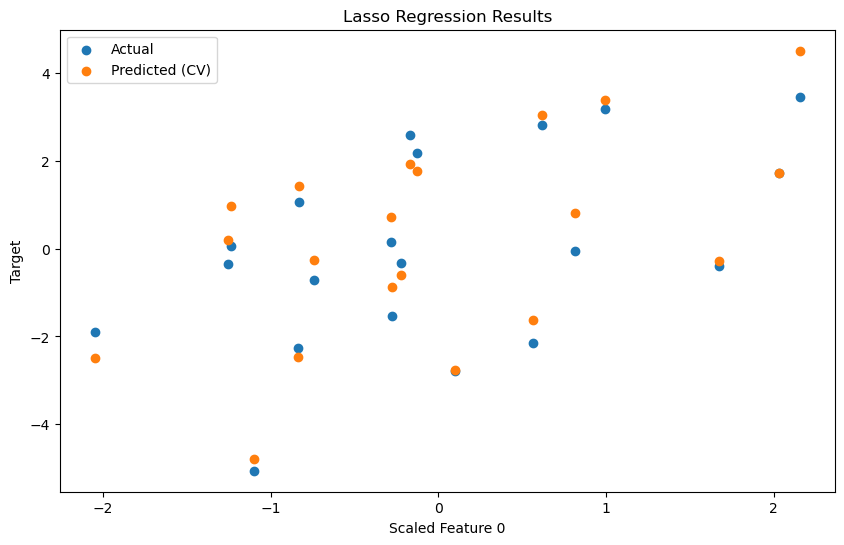

In [21]:
# 8. Plotting (Optional)
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], y_test, label='Actual')  # Plot against the first feature (just for visualization)
plt.scatter(X_test_scaled[:, 0], y_pred_cv, label='Predicted (CV)')
plt.xlabel('Scaled Feature 0')
plt.ylabel('Target')
plt.legend()
plt.title('Lasso Regression Results')
plt.show()

This code generates a scatter plot to visualize the performance of your Lasso Regression model on the test set. Let's break it down:

1. **`plt.figure(figsize=(10, 6))`**: This creates a new Matplotlib figure with a specified size of 10 inches wide and 6 inches tall.  This is just setting up the canvas for your plot.

2. **`plt.scatter(X_test_scaled[:, 0], y_test, label='Actual')`**:
   - `plt.scatter()`: This function creates a scatter plot.
   - `X_test_scaled[:, 0]`: This selects the first feature (index 0) from your scaled test data.  We're plotting the actual target values against just the first feature for visualization purposes (it's hard to visualize in more than two dimensions).
   - `y_test`: These are the actual target values from the test set.
   - `label='Actual'`: This sets the label for this set of points in the legend.

3. **`plt.scatter(X_test_scaled[:, 0], y_pred_cv, label='Predicted (CV)')`**:
   - This creates another scatter plot, but now for the predicted target values.
   - `y_pred_cv`: These are the predicted target values from your cross-validated Lasso model.
   - `label='Predicted (CV)'`: This sets the label for the predicted points in the legend.

4. **`plt.xlabel('Scaled Feature 0')`**: This sets the label for the x-axis (the first scaled feature).

5. **`plt.ylabel('Target')`**: This sets the label for the y-axis (the target variable).

6. **`plt.legend()`**: This displays the legend, which shows the labels for the actual and predicted points.

7. **`plt.title('Lasso Regression Results')`**: This sets the title of the plot.

8. **`plt.show()`**: This displays the plot.

**What you'll see:**

The plot will show two sets of points:

*   **"Actual" points (usually in blue):** These represent the true target values from your test set, plotted against the first feature.
*   **"Predicted (CV)" points (usually in orange):** These represent the target values predicted by your Lasso model, also plotted against the first feature.

**Interpreting the plot:**

Ideally, the "Predicted (CV)" points should be close to the "Actual" points.  The closer they are, the better your model is performing.  If the predicted points form a clear pattern or trend that matches the actual points, it suggests that your model has captured the underlying relationship between the features and the target variable well.

**Important Note:**

This plot only visualizes the relationship with the *first* feature.  If you have more than one feature (which is usually the case), it's difficult to visualize the full relationship in a single 2D plot.  However, this plot can still give you a general idea of how well your model is doing, especially if the first feature is one of the most important ones (as it often is in these illustrative examples).  For higher dimensional data, you'd rely more on the evaluation metrics (MSE, R-squared) to assess the model's performance.


In [22]:
# Example of how to use the model for prediction on new data
new_data = pd.DataFrame(np.random.randn(5, n_features), columns=[f'feature_{i}' for i in range(n_features)])
new_data_scaled = scaler.transform(new_data)  # Scale the new data using the same scaler
predictions = lasso_best.predict(new_data_scaled)
print("\nPredictions on New Data:")
print(predictions)


Predictions on New Data:
[ 2.13671242  1.06649449  2.12228194 -0.46738376 -1.76623559]


This code snippet demonstrates how to use your trained Lasso Regression model (`lasso_best`) to make predictions on entirely new, unseen data. Let's break it down:

1. **`new_data = pd.DataFrame(np.random.randn(5, n_features), columns=[f'feature_{i}' for i in range(n_features)])`**:
   - This creates a new Pandas DataFrame called `new_data` to represent your unseen data.
   - `np.random.randn(5, n_features)`: This generates a NumPy array with 5 rows (representing 5 new data points) and `n_features` columns (the same number of features as your original data). The values are drawn from a standard normal distribution (mean 0, standard deviation 1).  **Important:** In a real-world scenario, you would replace this with your actual new data.
   - `columns=[f'feature_{i}' for i in range(n_features)]`: This sets the column names of the DataFrame to match the names of your original features (e.g., 'feature_0', 'feature_1', etc.).  This is essential for consistency.

2. **`new_data_scaled = scaler.transform(new_data)`**:
   - This scales the new data using the *same* `StandardScaler` that you fit on the training data.  **Crucially**, you *must* use the same scaler that was used for training.  You should *not* fit a new scaler on the new data.  This ensures that the new data is scaled in the same way as the data the model was trained on.

3. **`predictions = lasso_best.predict(new_data_scaled)`**:
   - This uses your trained Lasso Regression model (`lasso_best`, the one trained with the optimal alpha) to make predictions on the scaled new data (`new_data_scaled`).  The result, `predictions`, is a NumPy array containing the predicted target variable values for each of the 5 new data points.

4. **`print("\nPredictions on New Data:")`**: This simply prints a header to indicate what the following output represents.

5. **`print(predictions)`**: This prints the array of predictions.

**Key Points and Best Practices:**

* **Consistent Scaling:**  It's absolutely essential to scale your new data using the *same* `StandardScaler` (or whatever scaler you used) that was fit on your training data.  Don't fit a new scaler on the new data.
* **Data Format:**  The new data should have the same number of features and the same feature names (or column order if you're using NumPy arrays directly) as your training data.
* **Real-World Data:**  In a real application, you would replace the `np.random.randn(5, n_features)` part with your actual new data, which you would load from a file or receive from some other source.
* **Prediction Interpretation:** The `predictions` array contains the predicted target variable values for your new data points.  You can then use these predictions for whatever purpose you need them for (e.g., making business decisions, forecasting, etc.).
